<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

# Introduction to Supervised Machine Learning: Classification
This notebook provides an overview of machine learning classification problems.

# Table of Contents
[Python Libraries in this Notebook](#Python-Libraries-in-this-Notebook)

[Example](#Example)

[Data-Loading](#Data-Loading)

[Train/Test Data Split](#Train/Test-Data-Split)

[Model Fit](#Model-Fit)

[Evaluate and Select Best Features](#Evaluate-and-Select-Best-Features)

[Further Evaluate and Select Features](#Further-Evaluate-and-Select-Features)

[](#)

[](#)

[](#)

[](#)

[](#)

[](#)

# Python Libraries in this Notebook
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

# Example
[Return to Table of Contents](#Table-of-Contents)

For this example we will use the "breast cancer" dataset from sklearn.datasets. We need to determine the minimum number of features that we need to use in our model to achieve a classification with 96% accuracy. The data in this case has a total of 31 features, however, not all the features are always useful in classification. In this notebook we will determine how to do feature selection in a logistic regression classification model.


## Data Loading
[Return to Table of Contents](#Table-of-Contents)

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [4]:
print(df.shape)
df.describe()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


## Train/Test Data Split
[Return to Table of Contents](#Table-of-Contents)

In [6]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [7]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

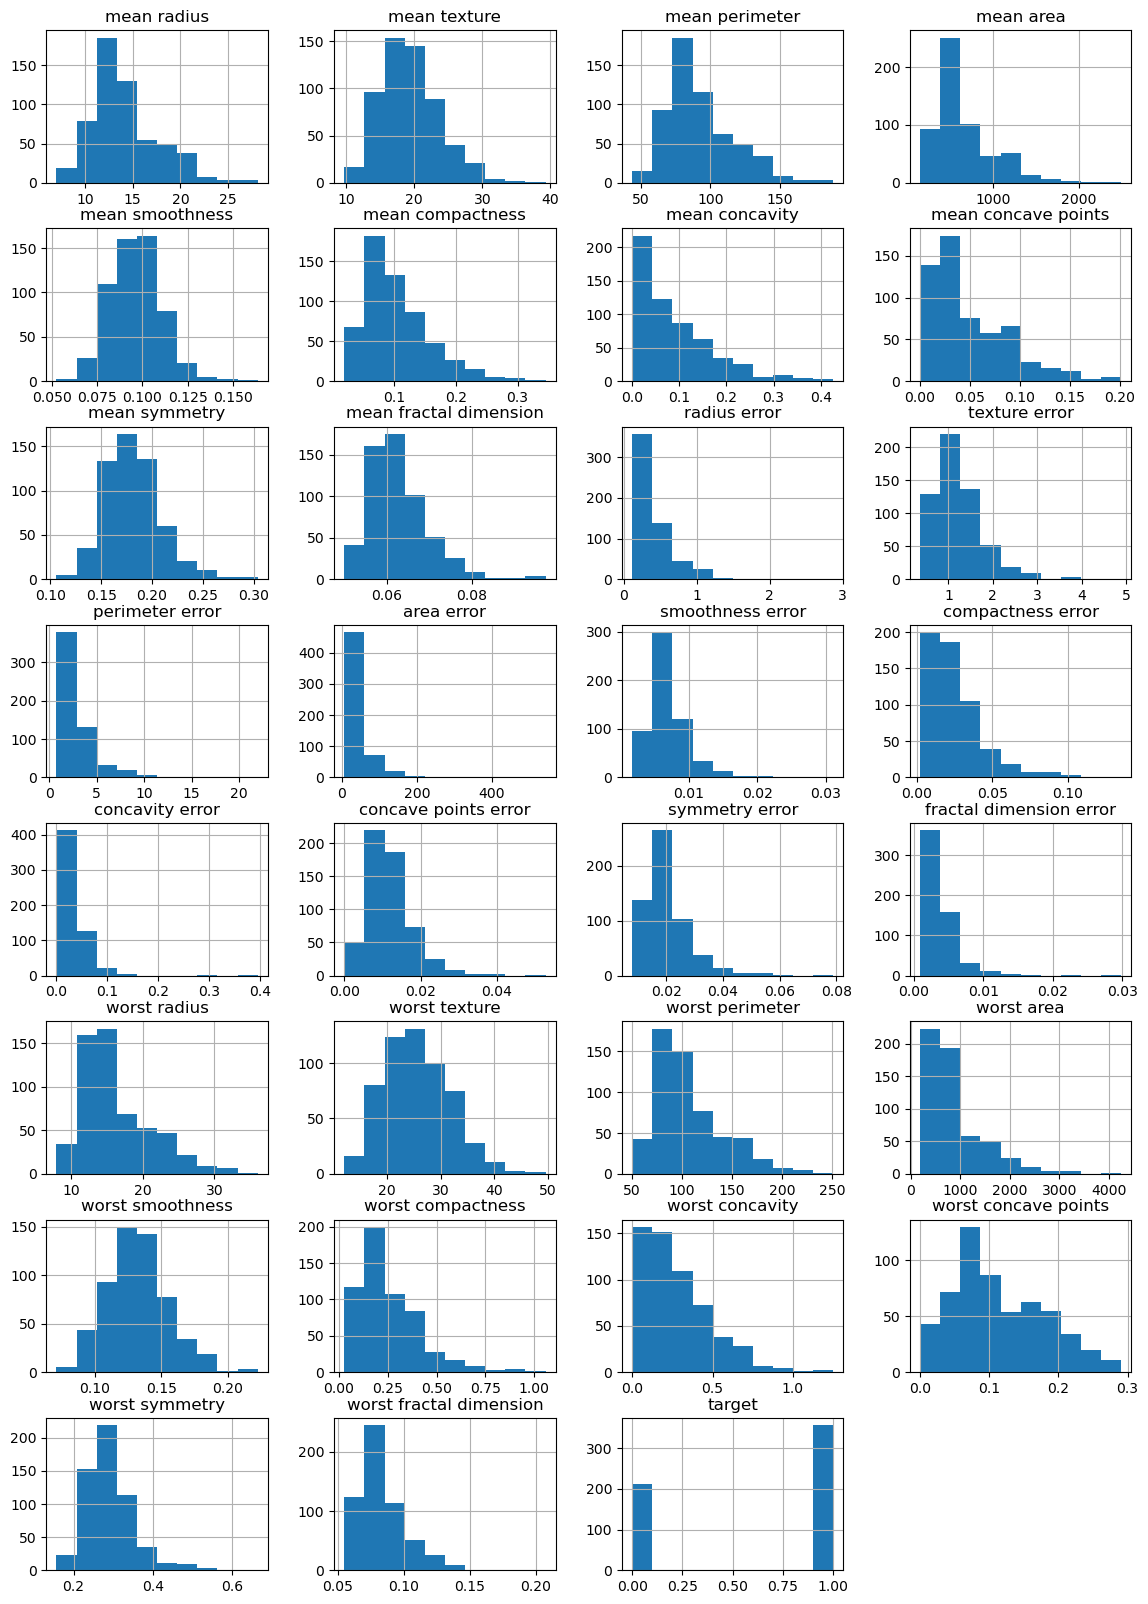

In [8]:
df.hist(layout=(8,4),figsize=(14,20))
plt.show()

## Model Fit
[Return to Table of Contents](#Table-of-Contents)

In [9]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# If model fails to converge may try to increase iterations:  max_iter=1000 or 5000
# Note if the accuracy value changes.

LogisticRegression(max_iter=5000)

In [10]:
#MODEL ACCURACY
logreg.score(X_test,y_test)

0.956140350877193

In [11]:
yhat=logreg.predict(X_test)

In [12]:
CM=confusion_matrix(y_test,yhat,labels=[0,1])
print(CM)

[[39  4]
 [ 1 70]]


## Evaluate and Select Best Features
[Return to Table of Contents](#Table-of-Contents)

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

print("Feature data dimension: ", x.shape)

select = SelectKBest(score_func=chi2, k=20) # Select features according to the k highest scores.
z = select.fit_transform(x, y) # Note that z returns an array of the data in each row.
print("After selecting best k features:", z.shape)
# 20 best features.

Feature data dimension:  (569, 30)
After selecting best k features: (569, 20)


In [14]:
z

array([[ 17.99  ,  10.38  , 122.8   , ...,   0.7119,   0.2654,   0.4601],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

In [15]:
# We can convert the array back to a dataframe if we need to with the following code.
cols = select.get_support(indices=True)
df_new = df.iloc[:,cols]
df_new

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,compactness error,concavity error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,worst symmetry
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,0.04904,0.05373,25.380,17.33,184.60,2019.0,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,0.01308,0.01860,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,0.04006,0.03832,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,0.07458,0.05661,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,0.02461,0.05688,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,0.02891,0.05198,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,0.02423,0.03950,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,0.03731,0.04730,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,0.06158,0.07117,25.740,39.42,184.60,1821.0,0.86810,0.9387,0.2650,0.4087


In [16]:
features = np.array(x.columns.tolist())

print("Selected best features:") # We can print the best features.
print(features[cols])

Selected best features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'mean concave points' 'radius error'
 'perimeter error' 'area error' 'compactness error' 'concavity error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst compactness' 'worst concavity' 'worst concave points'
 'worst symmetry']


In [17]:
x_filtered = x.iloc[:,cols]
X_train, X_test, y_train, y_test = train_test_split(x_filtered.values, y.values, 
                                                    test_size=0.2, random_state=42)

In [18]:
logreg = LogisticRegression(max_iter = 5000) 
logreg.fit(X_train, y_train)
logreg.score(X_test,y_test)

# If model fails to converge may try to increase iterations:  max_iter=1000 or 5000
# Note if the accuracy value changes.

0.9649122807017544

In [19]:
yhat=logreg.predict(X_test)
CM=confusion_matrix(y_test, yhat, labels=[0,1])
print(CM)

[[40  3]
 [ 1 70]]


# Further Evaluate and Select Features
[Return to Table of Contents](#Table-of-Contents)

In [20]:
# This is using the logistic regression function from stats model
# instead of the logistic regression function from SKLearn
model = sm.Logit(y_train, X_train)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.038324
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  455
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                           19
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.9419
Time:                        12:55:55   Log-Likelihood:                -17.438
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                9.654e-108
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.7409     21.703      0.633      0.527     -28.796      56.278
x2            -0.7803      0.567     -1.377      0.169      -1.891       0.330
x3            -0.5251      2.839     -0.185      0.853      -6.090       5.040
x4            -0.0818      0.104     -0.789      0.430      -0.285       0.121
x5           223.9788    112.184      1.997      0.046       4.102     443.856
x6            44.5964    109.310      0.408      0.683    -169.647     258.839
x7          -505.8769    250.328     -2.021      0.043    -996.511     -15.242
x8             6.5039     35.211      0.185      0.853     -62.509      75.517
x9             2.6304      4.050      0.650      0.516      -5.307      10.567
x10           -0.4886      0.374     -1.307      0.191      -1.222       0.244
x11          -68.5643    172.929     -0.396      0.692    -407.499     270.370
x12          143.4951    149.410      0.960      0.337    -149.343     436.333
x13           -4.2812     10.805     -0.396      0.692     -25.459      16.896
x14           -0.1442      0.262     -0.550      0.583      -0.658       0.370
x15            0.0566      0.641      0.088      0.930      -1.200       1.313
x16            0.0133      0.087      0.153      0.878      -0.157       0.184
x17            2.1300     26.214      0.081      0.935     -49.248      53.508
x18          -51.8320     33.891     -1.529      0.126    -118.258      14.594
x19          -13.9351     60.205     -0.231      0.817    -131.935     104.065
x20          -27.4629     16.408     -1.674      0.094     -59.623       4.697
==============================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [21]:
# Let's calculate the coefficients and the p-values for each column/feature.
# This also sorts all the coeficients in descending order of the p-values.
coefs = pd.DataFrame({'coef': results.params,'pvalue': results.pvalues,
                     }).sort_values(by='pvalue', 
                                    ascending=False)
coefs

,coef,pvalue
16,2.129969,0.935240
14,0.056577,0.929655
15,0.013348,0.878059
7,6.503859,0.853457
2,-0.525097,0.853274
18,-13.935102,0.816958
12,-4.281217,0.691942
10,-68.564290,0.691745
5,44.596386,0.683287
13,-0.144175,0.582574


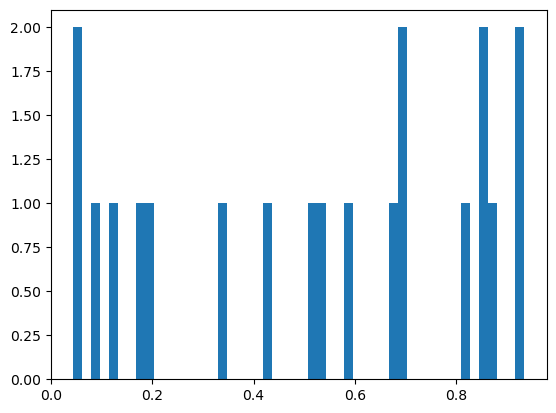

In [22]:
plt.hist(coefs.pvalue, bins=50);
# Develops a count of how many features within the p-value bins.

In [23]:
# We can iteratively change the p-value threshold to see which would give us the required accuracy.
p_val_threshold = 0.3
feature_cols = coefs[coefs.pvalue < p_val_threshold].index # Index of the feature.
print(f'There are {len(feature_cols)} columns with a p-value less than {p_val_threshold}.')

There are 6 columns with a p-value less than 0.3.


In [24]:
# Using only the features with a p-value of less than p_val_threshold.
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(X_train[:,feature_cols], y_train)
logreg.score(X_test[:,feature_cols],y_test)

0.9649122807017544

In [25]:
feature_cols # Note that the accuracy of 0.96 is the same with the columns here as with the 20 columns.
# The other 14 columns basically did not affect the accuracy of the model.

Int64Index([9, 1, 17, 19, 4, 6], dtype='int64')

In [26]:
yhat=logreg.predict(X_test[:,feature_cols])
CM=confusion_matrix(y_test,yhat,labels=[0,1])
print(CM)

[[40  3]
 [ 1 70]]


In [27]:
# Could also loop thru the number of features and see where the accuracy is maximum with the least amount of features.
# Would start with the feature with the lowest p-value, then take the features with lowest two p-value and so on.

# Notebook End